<a href="https://colab.research.google.com/github/maker57sk/ml_projects/blob/master/faceLandmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=76576e117c4136a1891e841aff1668467737e42255c0a6cc2a61e4d911d71637
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


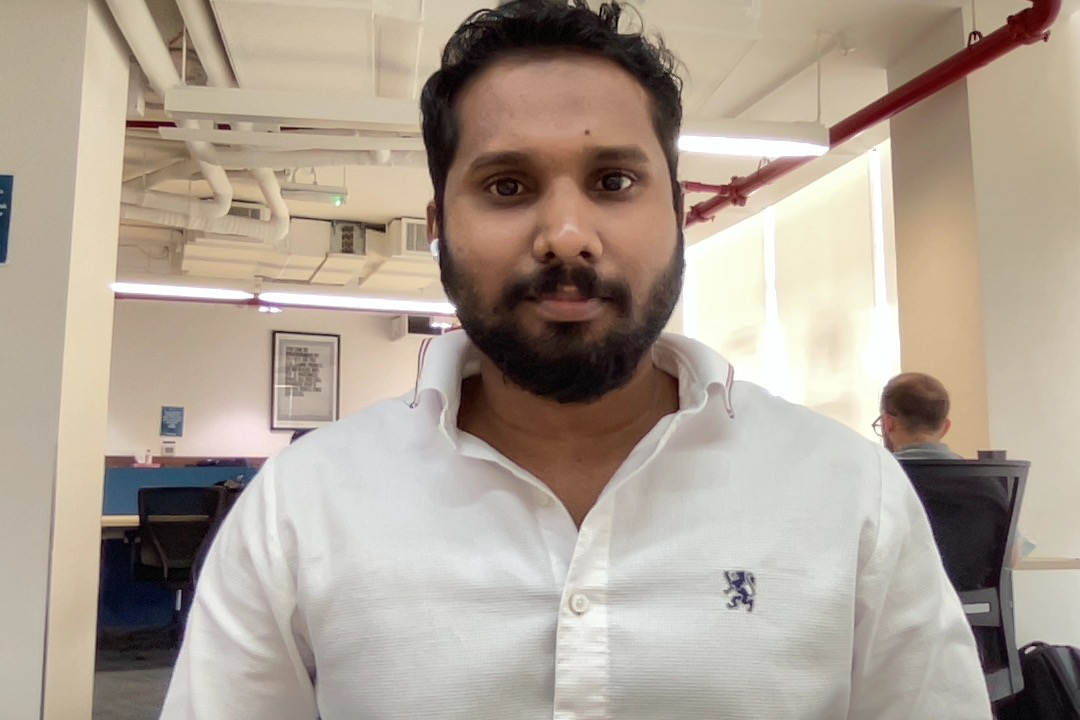

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('2.jpg')
display(pil_im)

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

FileNotFoundError: ignored

In [ ]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("two_people.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

In [ ]:
import face_recognition
image = face_recognition.load_image_file("2.jpg")
face_locations = face_recognition.face_locations(image)


In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)

In [ ]:
face_locations

[(112, 706, 379, 438)]

In [ ]:
face_landmarks_list

[{'bottom_lip': [(612, 299),
   (596, 309),
   (581, 313),
   (568, 314),
   (554, 314),
   (538, 310),
   (520, 299),
   (527, 299),
   (554, 299),
   (568, 300),
   (580, 299),
   (606, 299)],
  'chin': [(440, 191),
   (441, 223),
   (443, 254),
   (449, 287),
   (461, 317),
   (480, 340),
   (507, 358),
   (537, 372),
   (570, 375),
   (601, 371),
   (627, 356),
   (650, 335),
   (666, 308),
   (675, 278),
   (679, 245),
   (677, 211),
   (672, 179)],
  'left_eye': [(486, 189),
   (499, 179),
   (516, 179),
   (532, 192),
   (515, 195),
   (498, 195)],
  'left_eyebrow': [(462, 174), (475, 157), (497, 149), (520, 149), (542, 156)],
  'nose_bridge': [(562, 181), (564, 201), (566, 220), (568, 240)],
  'nose_tip': [(542, 260), (555, 262), (568, 265), (581, 262), (593, 259)],
  'right_eye': [(589, 190),
   (603, 175),
   (620, 173),
   (634, 182),
   (622, 190),
   (605, 192)],
  'right_eyebrow': [(579, 153),
   (599, 145),
   (620, 144),
   (641, 148),
   (654, 163)],
  'top_lip': [(520

In [ ]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("2.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
pil_image.show()

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(440, 191), (441, 223), (443, 254), (449, 287), (461, 317), (480, 340), (507, 358), (537, 372), (570, 375), (601, 371), (627, 356), (650, 335), (666, 308), (675, 278), (679, 245), (677, 211), (672, 179)]
The left_eyebrow in this face has the following points: [(462, 174), (475, 157), (497, 149), (520, 149), (542, 156)]
The right_eyebrow in this face has the following points: [(579, 153), (599, 145), (620, 144), (641, 148), (654, 163)]
The nose_bridge in this face has the following points: [(562, 181), (564, 201), (566, 220), (568, 240)]
The nose_tip in this face has the following points: [(542, 260), (555, 262), (568, 265), (581, 262), (593, 259)]
The left_eye in this face has the following points: [(486, 189), (499, 179), (516, 179), (532, 192), (515, 195), (498, 195)]
The right_eye in this face has the following points: [(589, 190), (603, 175), (620, 173), (634, 182), (622, 190), (605, 192)]
The to

In [ ]:
nb = face_landmarks['nose_bridge']
nt = face_landmarks['nose_tip']
le = face_landmarks['left_eye']
re = face_landmarks['right_eye']


In [ ]:
type(nb)

list

In [ ]:
nb

[(562, 181), (564, 201), (566, 220), (568, 240)]

In [ ]:
import pandas as pd

nose_bridge = pd.DataFrame(nb, columns=['BX', 'BY'])

bx = nose_bridge['BX']
by = nose_bridge['BY']

nose_bridge

,BX,BY
0,562,181
1,564,201
2,566,220
3,568,240


In [ ]:
nose_tip  = pd.DataFrame(nt, columns=['TX', 'TY'])


In [ ]:
nose_tip

,TX,TY
0,542,260
1,555,262
2,568,265
3,581,262
4,593,259


In [ ]:
nose_tip

tx = nose_tip['TX']
ty = nose_tip['TY']

In [ ]:
nose_tip = pd.DataFrame(nt, columns=['X', 'Y'])

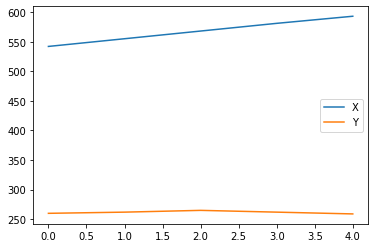

In [ ]:
nose_tip.plot()

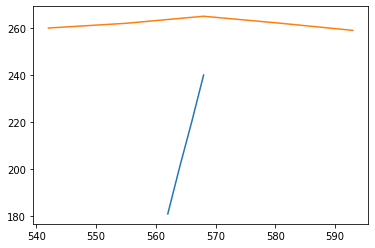

In [ ]:
from matplotlib import pyplot as plt
plt.plot(bx,by)
plt.plot(tx,ty)
plt.show()

In [ ]:
le

[(486, 189), (499, 179), (516, 179), (532, 192), (515, 195), (498, 195)]

In [ ]:
left_eye = pd.DataFrame(le, columns= ['ex','ey'])
right_eye = pd.DataFrame(re, columns= ['rx','ry'])


ex = left_eye['ex']
ey = left_eye['ey']

rx = right_eye['rx']
ry = right_eye['ry']

In [ ]:
left_eye

,ex,ey
0,486,189
1,499,179
2,516,179
3,532,192
4,515,195
5,498,195


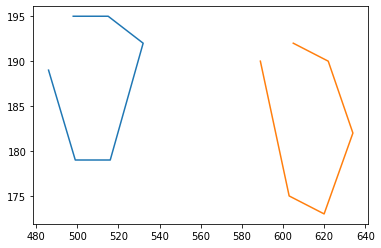

In [ ]:
plt.plot(ex,ey)
plt.plot(rx,ry)

plt.show()